# Introduction computer vision et machine learning 

## Chargement des data 

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.neighbors import DistanceMetric
from time import perf_counter 

In [2]:
def plot_gallery(images):
# Affiche les 12 premières images contenues dans images
# images est de taille Nb image*Ny*Nx
    plt.figure(figsize=(7.2, 7.2))
    plt.subplots_adjust(bottom=0, left=.01, right=.99, top=.90, hspace=.35)
    for i in range(12):
        plt.subplot(3, 4, i + 1)
        plt.imshow(images[i], cmap=plt.cm.gray)
        plt.xticks(())
        plt.yticks(())
    plt.show()

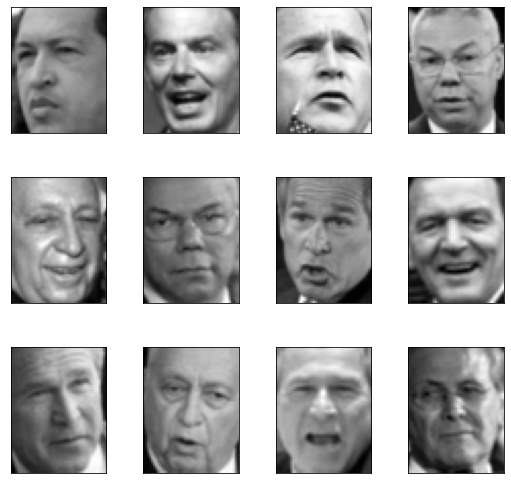

In [3]:
#charger et afficher les données 
[X, y, name]=np.load("TP1.npy",allow_pickle=True )
plot_gallery(X)

In [4]:
print("la taille des images est : ", len(X[0]),'x',len(X[0][0]),"pixels")
print("le nombre  d'images est : ", len(y))
print("le nombre de classes est : ", len(name))

la taille des images est :  62 x 47 pixels
le nombre  d'images est :  1288
le nombre de classes est :  7


In [5]:
#afficher le nombre de classes 
print(name)

['Ariel Sharon' 'Colin Powell' 'Donald Rumsfeld' 'George W Bush'
 'Gerhard Schroeder' 'Hugo Chavez' 'Tony Blair']


(array([ 77., 236., 121., 530., 109.,  71., 144.]),
 array([0.        , 0.85714286, 1.71428571, 2.57142857, 3.42857143,
        4.28571429, 5.14285714, 6.        ]),
 <BarContainer object of 7 artists>)

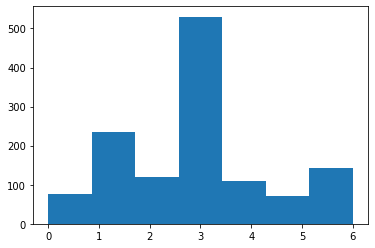

In [26]:
#afficher un histogramme des classes 
plt.hist(y, bins=7)

In [6]:
#faire un split 25%
X_train, X_test, Y_train, Y_test = train_test_split(X, y, test_size=0.25, random_state=42, shuffle=True, stratify=None)

In [8]:
#affciher les dimensions des vecteurs de test et de train 


nombre d'images en train :  966
nombre d'images en test :  322
Dimensions de X_train :  (966, 62, 47)
Dimensions de X_test :  (322, 62, 47)
Dimensions de y_train :  966
Dimensions de y_test :  322


In [7]:
print(X_train.shape, X_test.shape, Y_train.shape, Y_test.shape)

(966, 62, 47) (322, 62, 47) (966,) (322,)


## Prétraitement des données:

In [22]:
#redimensionnement des données 
# X_train -> (966, 2914)
# X_test -> (322, 2914)
X_train = X_train.reshape(966, 2914)
X_test = X_test.reshape(322, 2914)

In [23]:
X_train.shape

(966, 2914)

Standardiser les fonctionnalités en supprimant la moyenne et en mettant à l'échelle la variance unitaire

Le score standard d'un échantillon x est calculé comme suit:

z = (x - u) / s

Où u est la moyenne des échantillons d'apprentissage ou 0 si with_mean=False, et s est l'écart type des échantillons d'apprentissage ou 1 si with_std=False.

Le centrage et la mise à l'échelle se produisent indépendamment sur chaque fonctionnalité en calculant les statistiques pertinentes sur les échantillons de l'ensemble d'apprentissage. La moyenne et l'écart type sont ensuite stockés pour être utilisés sur des données ultérieures à l'aide de la transformation.

Trouver la fonction qui le fait et appliquer la sur les data

In [40]:
#standardiser vos données (train et test)
scaler = StandardScaler().fit(X_train)

Xtrain = scaler.transform(X_train)
Xtest = scaler.transform(X_test)

## Classification par les KPPV:

In [41]:
#Faire un classifieur kppv avec k=1:
neigh = KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=1, p=2,
                     weights='uniform')

neigh.fit(Xtrain, Y_train)

KNeighborsClassifier(n_neighbors=1)

In [47]:
y_pred = neigh.predict(Xtest)

In [48]:
#afficher votre accuracy
y_pred

array([6, 3, 6, 3, 3, 3, 1, 1, 0, 3, 3, 3, 1, 4, 3, 4, 6, 3, 3, 4, 1, 2,
       3, 0, 0, 1, 1, 3, 3, 4, 3, 3, 3, 3, 3, 2, 1, 3, 3, 3, 3, 1, 3, 1,
       3, 1, 1, 6, 0, 3, 3, 3, 0, 1, 6, 2, 2, 5, 3, 3, 1, 1, 0, 4, 0, 3,
       6, 2, 3, 3, 1, 6, 5, 3, 3, 2, 5, 6, 3, 4, 3, 1, 4, 1, 3, 3, 3, 3,
       6, 3, 3, 6, 3, 2, 6, 5, 1, 1, 3, 2, 3, 1, 3, 2, 3, 4, 3, 3, 5, 3,
       3, 1, 6, 3, 6, 4, 6, 4, 1, 1, 1, 3, 3, 0, 3, 4, 6, 3, 3, 2, 6, 3,
       0, 5, 1, 2, 5, 3, 3, 6, 0, 2, 5, 1, 3, 3, 5, 3, 3, 6, 5, 1, 3, 6,
       3, 3, 6, 3, 1, 3, 6, 4, 5, 1, 3, 5, 5, 1, 5, 6, 3, 1, 3, 1, 4, 3,
       3, 2, 2, 3, 3, 3, 3, 1, 6, 2, 3, 5, 3, 2, 3, 2, 4, 2, 6, 3, 3, 3,
       3, 6, 3, 2, 4, 1, 3, 3, 6, 2, 3, 0, 4, 3, 3, 3, 2, 3, 3, 3, 4, 3,
       6, 3, 1, 4, 1, 3, 2, 3, 1, 3, 3, 3, 3, 0, 2, 2, 6, 3, 3, 3, 3, 0,
       2, 6, 6, 4, 3, 3, 6, 4, 6, 3, 3, 3, 3, 4, 2, 6, 5, 3, 3, 6, 3, 1,
       3, 6, 3, 1, 3, 3, 1, 1, 2, 3, 6, 2, 3, 3, 5, 6, 6, 1, 3, 3, 1, 3,
       3, 3, 3, 4, 4, 3, 5, 0, 3, 3, 5, 5, 3, 3, 3,

In [44]:
print(accuracy_score(Y_test, y_pred))

0.577639751552795


In [49]:
Xtest

array([[-0.04110785, -0.08977407, -0.51783454, ..., -1.1757991 ,
        -1.0625758 , -0.9618954 ],
       [ 0.4956123 ,  0.33600488,  0.31615207, ..., -1.4151839 ,
        -1.3763784 , -1.2908627 ],
       [-0.61313874, -0.02482473,  0.51720244, ...,  0.9282671 ,
         0.81187165,  0.799537  ],
       ...,
       [-0.4648344 , -0.34235495, -0.3689084 , ...,  1.0164615 ,
         1.3139558 ,  1.5282619 ],
       [-1.2911011 , -1.4320605 , -1.5901033 , ...,  0.34450412,
         0.38510004,  0.4705696 ],
       [ 2.628369  ,  2.9411952 ,  2.9819312 , ..., -1.0792053 ,
        -0.832454  , -0.63709223]], dtype=float32)

In [50]:
Y_test

array([3, 3, 6, 3, 3, 3, 4, 1, 3, 3, 3, 3, 3, 6, 3, 3, 3, 3, 3, 4, 1, 2,
       3, 2, 0, 1, 2, 3, 3, 3, 2, 3, 3, 3, 3, 3, 3, 3, 3, 1, 3, 1, 3, 1,
       1, 1, 4, 3, 2, 3, 3, 3, 0, 3, 6, 2, 1, 3, 5, 3, 1, 1, 1, 4, 3, 5,
       6, 4, 1, 3, 5, 6, 3, 3, 3, 2, 1, 6, 4, 4, 3, 0, 4, 3, 3, 3, 3, 3,
       3, 3, 3, 6, 3, 4, 1, 5, 1, 1, 6, 6, 3, 1, 3, 1, 3, 3, 3, 3, 3, 1,
       4, 1, 3, 3, 3, 1, 3, 4, 1, 3, 1, 3, 3, 0, 3, 4, 4, 3, 1, 1, 6, 6,
       6, 6, 2, 4, 3, 3, 1, 6, 2, 2, 5, 1, 3, 5, 1, 3, 6, 1, 5, 1, 1, 3,
       3, 3, 6, 0, 1, 3, 6, 5, 5, 1, 3, 5, 5, 1, 0, 3, 1, 1, 6, 1, 5, 6,
       3, 2, 2, 4, 3, 3, 3, 2, 3, 3, 3, 3, 3, 2, 3, 2, 3, 2, 6, 3, 3, 6,
       3, 6, 3, 2, 1, 2, 3, 3, 6, 2, 1, 0, 3, 5, 3, 3, 3, 3, 3, 0, 0, 1,
       3, 3, 1, 1, 6, 3, 3, 3, 1, 3, 3, 3, 1, 0, 3, 1, 6, 3, 3, 3, 3, 4,
       2, 4, 3, 0, 3, 3, 3, 6, 4, 3, 2, 6, 3, 4, 2, 1, 6, 2, 2, 3, 6, 1,
       3, 4, 3, 1, 4, 6, 1, 1, 3, 3, 6, 3, 6, 3, 3, 3, 1, 2, 3, 3, 1, 0,
       3, 3, 3, 4, 4, 3, 5, 1, 3, 0, 4, 1, 3, 4, 3,

In [13]:
#afficher la matrice de confusion


[[  5   1   0   4   2   1   0]
 [  2  31   4  12   4   3   4]
 [  3   5  15   4   0   0   0]
 [  2   5   9 102   6   7  15]
 [  1   2   3   5   9   1   4]
 [  0   1   0   4   2   8   0]
 [  1   3   2  10   2   2  16]] 



In [56]:
print(name)

['Ariel Sharon' 'Colin Powell' 'Donald Rumsfeld' 'George W Bush'
 'Gerhard Schroeder' 'Hugo Chavez' 'Tony Blair']


<AxesSubplot:>

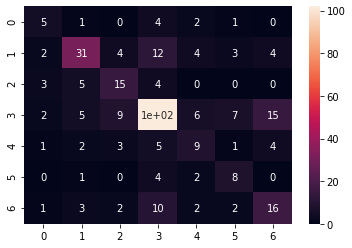

In [58]:
import seaborn as sns
sns.heatmap(confusion_matrix(Y_test, y_pred), annot=True, )
#print(confusion_matrix(Y_test, y_pred))

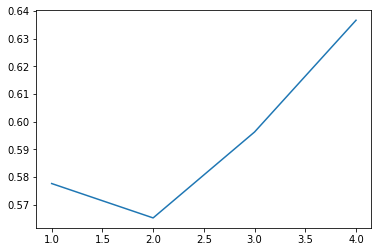

In [14]:
#b. afficher l'evolution du score du KNeighborsClassifier :


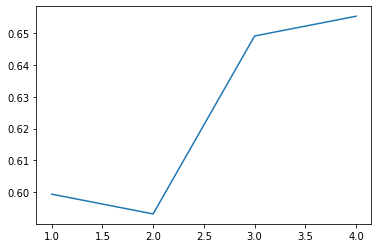

In [15]:
#c. afficher le meme graphique avec une distance de Manhattan:
#Que remarquez vous 
